In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier


import pickle
import warnings 
warnings.simplefilter('ignore')

In [3]:
em = pd.read_csv(r'C:\Users\abhip\Documents\Downloads\email.csv')

In [4]:
em.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
em.sample(5)

,Category,Message
3091,ham,Am going to take bath ill place the key in win...
2202,ham,"A boy was late 2 home. His father: ""POWER OF F..."
4049,ham,Lol or I could just starve and lose a pound by...
5063,ham,Havent stuck at orchard in my dad's car. Going...
687,ham,Every King Was Once A Crying Baby And Every Gr...


In [5]:
em.tail()

,Category,Message
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,"{""mode"":""full""",isActive:false}


In [6]:
em.columns

Index(['Category', 'Message'], dtype='object')

In [7]:
em.size

11146

In [8]:
em.shape

(5573, 2)

In [9]:
em.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
em.isnull().sum()

Category    0
Message     0
dtype: int64

In [12]:
em.duplicated().sum()

415

In [13]:
em = em.rename(columns={'Category':'Target'})

In [14]:
em.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
em.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: ylabel='Target'>

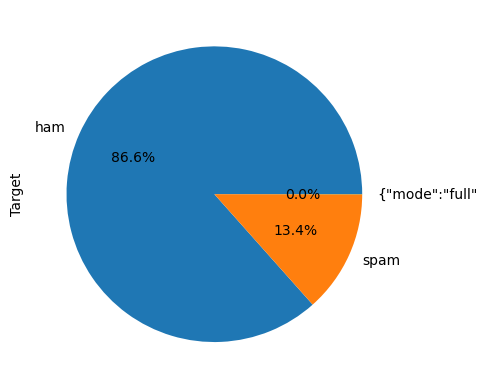

In [16]:
em.groupby('Target')['Target'].count().nlargest(16).plot(kind = 'pie', autopct = '%1.1f%%')

In [17]:
encoder = LabelEncoder()
em['Target']=encoder.fit_transform(em['Target'])
em['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5568    0
5569    0
5570    0
5571    0
5572    2
Name: Target, Length: 5573, dtype: int32

In [18]:
em.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
x = em['Message']
y = em['Target']

In [20]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5568    0
5569    0
5570    0
5571    0
5572    2
Name: Target, Length: 5573, dtype: int32

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [48]:
cv = CountVectorizer()

In [51]:
X_train_counts = cv.fit_transform(x_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [52]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [53]:
print(x_train_cv)

  (0, 955)	1
  (0, 7875)	1
  (0, 2501)	1
  (0, 4278)	1
  (0, 4267)	1
  (0, 5526)	1
  (0, 7627)	1
  (0, 1199)	1
  (0, 3976)	1
  (0, 3989)	1
  (1, 3976)	2
  (1, 6129)	1
  (1, 1868)	1
  (1, 7236)	1
  (1, 5128)	1
  (1, 4656)	1
  (2, 3529)	1
  (2, 5319)	1
  (2, 8015)	1
  (2, 4954)	1
  (2, 1628)	1
  (2, 1037)	1
  (2, 3652)	1
  (2, 2933)	1
  (3, 4954)	2
  :	:
  (5010, 8049)	1
  (5010, 2675)	1
  (5010, 8032)	1
  (5011, 4278)	1
  (5011, 4419)	1
  (5011, 6725)	1
  (5011, 1714)	1
  (5012, 3594)	1
  (5012, 5685)	1
  (5012, 5962)	1
  (5012, 3194)	1
  (5012, 6731)	1
  (5012, 6730)	1
  (5013, 7381)	1
  (5013, 6406)	1
  (5013, 5149)	1
  (5013, 4080)	1
  (5014, 3976)	1
  (5014, 4112)	1
  (5014, 3578)	1
  (5014, 2448)	1
  (5014, 6299)	1
  (5014, 7128)	1
  (5014, 6691)	1
  (5014, 4979)	1


In [54]:
lr = LogisticRegression()

In [55]:
lr.fit(x_train_cv,y_train)
prediction_train = lr.predict(x_train_cv)

In [56]:
print(accuracy_score(y_train,prediction_train)*100)

99.90029910269193


In [57]:
prediction_test = lr.predict(x_test_cv)

In [58]:
print(accuracy_score(y_test,prediction_test)*100)

98.2078853046595


In [59]:
print(accuracy_score(x_train,prediction_train)*100)
print(accuracy_score(x_test,prediction_test)*100)

0.0
0.0


In [60]:
with open('logistic.pickle','wb') as f:
    pickle.dump(lr,f)

In [61]:
with open('logistic.pickle','rb') as f:
    load_file = pickle.load(f)
    print(load_file)

LogisticRegression()


In [62]:
em.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
em.tail()

,Target,Message
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name
5572,2,isActive:false}


In [64]:
em.sample(5501)

,Target,Message
3891,1,Double Mins & 1000 txts on Orange tariffs. Lat...
2258,0,Here got lots of hair dresser fr china.
1412,0,somewhere out there beneath the pale moon ligh...
3341,0,Like I made him throw up when we were smoking ...
2367,1,Tone Club: Your subs has now expired 2 re-sub ...
...,...,...
307,0,Jos ask if u wana meet up?
3545,0,Lol ok ill try to send. Be warned Sprint is de...
4472,0,Wa... U so efficient... Gee... Thanx...
4569,0,hiya hows it going in sunny africa? hope u r a...


In [71]:
input_mail = ["Double Mins & 1000 txts on Orange tariffs. Lat..."]

input_mail_features = cv.transform(input_mail)
prediction = lr.predict(input_mail_features)

if(prediction == 1):
    print("SPAM MAIL")
else:
    print("HAM MAIL")

HAM MAIL


In [72]:

# function to predict if an email is spam or not
def predict_spam(email):
    email_counts = cv.transform([email])
    prediction = lr.predict(email_counts)
    return 'Spam' if prediction[0] == 1 else 'Not Spam'

# test
test_email = "Congratulations! You've won a $1000 gift card. Click here to claim your prize."
print(predict_spam(test_email))

Spam
